# Pymaceuticals, Inc.

In [1]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
#csv Paths
mouse_csv="data/Mouse_metadata.csv"
study_csv="data/Study_results.csv"
#Read csvs to DataFrames
mouse_df=pd.read_csv(mouse_csv)
study_df=pd.read_csv(study_csv)

In [3]:
#create merged DataFrame on Mouse ID
combined_df=pd.merge(study_df, mouse_df, how="left", on=["Mouse ID","Mouse ID"])
#Preview display
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
#Determine original number of mice
len(combined_df["Mouse ID"].unique())

249

In [5]:
#Narrow the DataFrame to inspect for duplicate Mouse IDs
mouse_hunt_df=combined_df[["Mouse ID","Timepoint"]]

In [6]:
#Return a series that reflects the number of Timepoints for a given Mouse ID.
#Already we can see at least one duplicate entry. 
mouse_hunt_s=mouse_hunt_df.value_counts()
mouse_hunt_s

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
                      ..
i334      20           1
          15           1
          10           1
          5            1
z969      45           1
Length: 1888, dtype: int64

In [7]:
#Narrow the series to display only duplicate Timepoints.
#Verify there is only one duplicate Mouse ID.
duplicate_s=mouse_hunt_s[mouse_hunt_s >1]
duplicate_s

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
dtype: int64

In [8]:
#Clean the combined DataFrame to remove the duplicate Mouse ID.
cleaned_df=combined_df.loc[(combined_df["Mouse ID"]!="g989"),:]
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
#verify the removal of g989
len(cleaned_df["Mouse ID"].unique())

248

# Summary Statistics

In [10]:
#group Tumor Volume by Drug Regimen and do statistical analysis
#mean
tumor_mean=cleaned_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
#median
tumor_med=cleaned_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
#variance
tumor_var=cleaned_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
#standard deviation
tumor_stdev=cleaned_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
#standard error
tumor_sem=cleaned_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

In [11]:
#Assemble DataFrame with Tumor Volume v. Drug Regimen Data Analysis
tumor_v_drug_df=pd.DataFrame({"Mean Tumor Volume (mm3)":tumor_mean,
                             "Median Tumor Volume (mm3)":tumor_med,
                             "Tumor Volume Variance (mm3)":tumor_var,
                             "Tumor Volume Std. Dev. (mm3)":tumor_stdev,
                             "Tumor Volume Std. Err. (mm3)":tumor_sem})
tumor_v_drug_df

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume Variance (mm3),Tumor Volume Std. Dev. (mm3),Tumor Volume Std. Err. (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

In [12]:
#Determine number of Timepoints for each Drug Regimen and sort
drug_v_tp_s=cleaned_df["Drug Regimen"].value_counts()

<AxesSubplot:title={'center':'Timepoints per Drug Regimen'}, ylabel='Timepoints'>

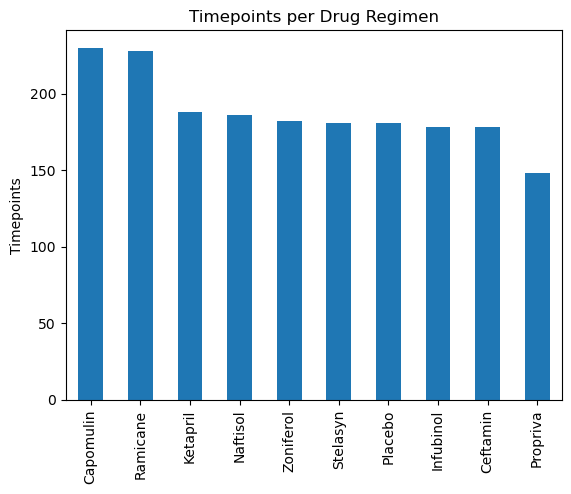

In [13]:
#plot Bar Chart with Pandas .plot
drug_v_tp_s.plot(kind="bar", ylabel='Timepoints', title='Timepoints per Drug Regimen')

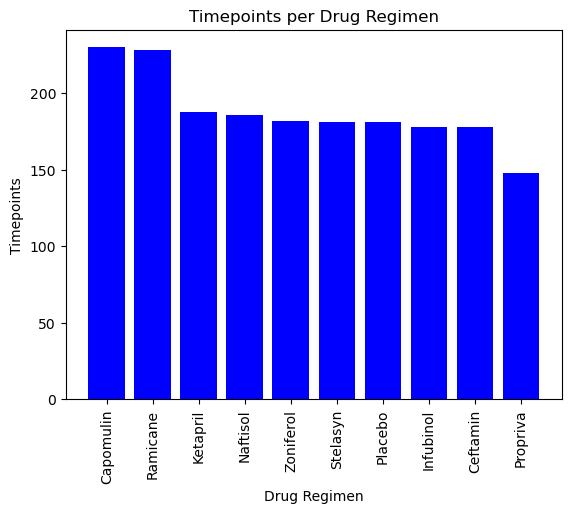

In [14]:
#process Dataset for pyplot
drug_reg=list(drug_v_tp_s.index.values)
t_points=drug_v_tp_s.tolist()

#plot with pyplot
plt.bar(drug_reg, t_points, color='b')
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Timepoints")
plt.title("Timepoints per Drug Regimen")
plt.show()

In [15]:
#quantify the sex of the mice in the studies
mouse_sex=cleaned_df["Sex"].value_counts()

<AxesSubplot:title={'center':'Distribution of Timepoints by Sex'}, ylabel='Sex'>

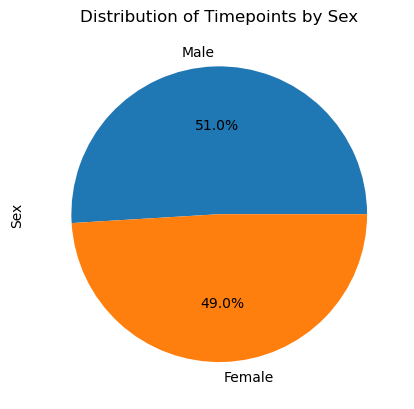

In [16]:
#create Mouse Sex pie chart using pandas
mouse_sex.plot(kind='pie', title="Distribution of Timepoints by Sex", autopct='%1.1f%%')

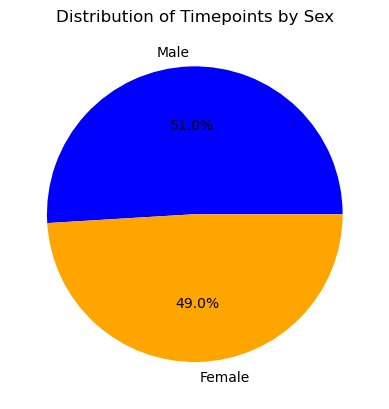

In [17]:
#process Dataset for pyplot
sex_labels=list(mouse_sex.index.values)
sex_values=mouse_sex.tolist()
#set color to match pandas graph
sex_color=["Blue","Orange"]
#plot Piechart using pyplot
plt.pie(sex_values, labels=sex_labels, colors=sex_color, autopct="%1.1f%%")
plt.title("Distribution of Timepoints by Sex")
plt.show()

# Quartiles, Outliers and Boxplots

In [18]:
#Calculate Final Tumor Volume of each mouse for 4 drug regimens:
#Capomulin, Ramicane, Infubinol, and Ceftamin
#determine Final Timepoint for each mouse:
final_tp=cleaned_df.groupby(["Mouse ID"]).max()["Timepoint"]
#rename the data to reflect only final Timepoints
final_tp.name="Final Timepoint"
#Convert series to DataFrame and reset index
final_tp_df=pd.DataFrame(final_tp)
final_tp_df.reset_index(inplace=True)
final_tp_df

,Mouse ID,Final Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [19]:
#merge with cleaned overall study DataFrame
cleaned_ftp_df=pd.merge(cleaned_df,final_tp_df, on="Mouse ID")
cleaned_ftp_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Final Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45
...,...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17,45
1876,m601,30,31.758275,1,Capomulin,Male,22,17,45
1877,m601,35,30.834357,1,Capomulin,Male,22,17,45
1878,m601,40,31.378045,1,Capomulin,Male,22,17,45


In [20]:
#Create variables for use with loop
drug_list=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumors=[]
drug_outliers=[]
final_tumor_df=pd.DataFrame()

In [21]:
#loop though the selected Drug Regimens
for drug in drug_list:
    #.loc only rows with the selected Drug Regimen and where the Timepoint matches the Final Timepoint
    final_drug_df=cleaned_ftp_df.loc[(cleaned_ftp_df["Drug Regimen"]==drug) & (cleaned_ftp_df["Timepoint"]==cleaned_ftp_df["Final Timepoint"]),:]
    #collect Mouse ID and Tumor Volume from the rows that match the criteria
    final_tumor_df[f"{drug}"]=list(final_drug_df["Tumor Volume (mm3)"])
    #determine Quartile 3, Quartile 1, and IQR to determine outliers
    #code adapted from "https://www.statology.org/interquartile-range-python/"
    drug_q3, drug_q1 = np.percentile(final_drug_df["Tumor Volume (mm3)"], [75 ,25])
    drug_iqr = drug_q3 - drug_q1
    #for each drug, convert Final Tumor Volume column into a list
    final_tumors=list(final_drug_df["Tumor Volume (mm3)"])
    #loop said list to search for outliers
    for tumor in final_tumors:
        if tumor<(drug_q1-1.5*drug_iqr)  or tumor>(drug_q3+1.5*drug_iqr):
            drug_outliers.append(tumor)
    #print any outliers and reset list
    print(f"{drug}'s potential outliers:{drug_outliers}. {drug} IQR: {round(drug_iqr,3)}.")
    drug_outliers=[]                   

Capomulin's potential outliers:[]. Capomulin IQR: 7.782.
Ramicane's potential outliers:[]. Ramicane IQR: 9.099.
Infubinol's potential outliers:[36.3213458]. Infubinol IQR: 11.477.
Ceftamin's potential outliers:[]. Ceftamin IQR: 15.578.


<AxesSubplot:ylabel='Final Tumor Volume (mm3)'>

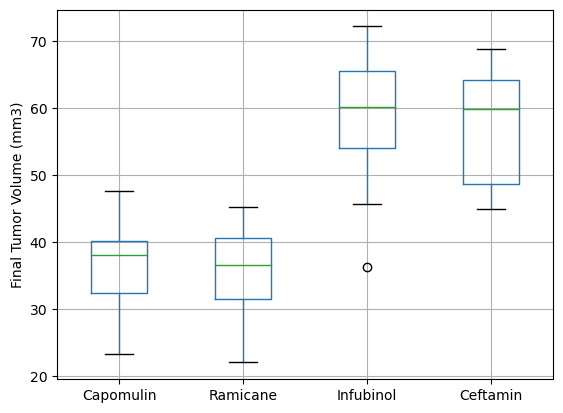

In [22]:
#generate and set y_axis boxplot
tumor_bp=final_tumor_df.boxplot()
tumor_bp.set_ylabel("Final Tumor Volume (mm3)")
#display boxplot
tumor_bp

# Line and Scatter Plots

<AxesSubplot:title={'center':'Capomulin treatment of mouse l509'}, xlabel='Timepoint', ylabel='Tumor Volume (mm3)'>

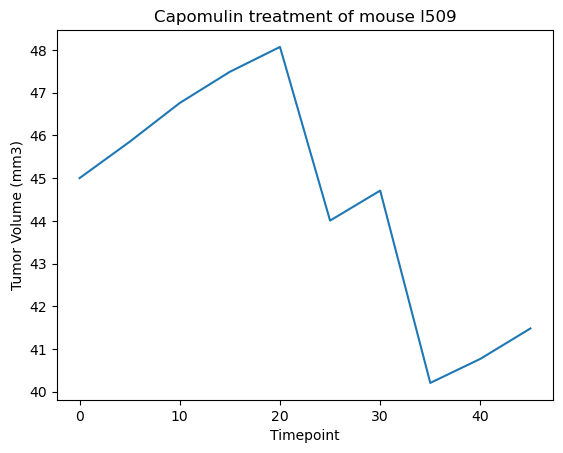

In [23]:
#select a single mouse on the Capomulin Drug Regimen and display tumor volume over time
mouse_l509=cleaned_df.loc[(cleaned_df["Mouse ID"]=="l509")]
mouse_l509.plot.line(x='Timepoint',y='Tumor Volume (mm3)',
                     title="Capomulin treatment of mouse l509",
                     legend=False, ylabel="Tumor Volume (mm3)")

In [24]:
#display data points for Tumor Volume and mouse weight for the Capomulin Drug Regimen
#narrow data to only the Capomulin Drug Regimen
capomulin_df=cleaned_df.loc[(cleaned_df["Drug Regimen"]=="Capomulin")]
#further narrow the DataFrame to only the relevant information
reduced_capo_df=capomulin_df[["Mouse ID", "Tumor Volume (mm3)", "Weight (g)"]]
#now get the Average Tumor Volume and Weight of each mouse
capo_sp_df=reduced_capo_df.groupby("Mouse ID").mean()
#rename the Tumor Volume column to reflect the average
capo_sp_df.rename(columns={"Tumor Volume (mm3)":"Average Tumor Volume (mm3)"}, inplace=True)
capo_sp_df

,Average Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22.0
b742,40.083699,21.0
f966,36.505973,17.0
g288,41.990097,19.0
g316,44.613344,22.0
i557,44.805810,24.0
i738,39.141053,20.0
j119,44.465236,23.0
j246,43.216925,21.0


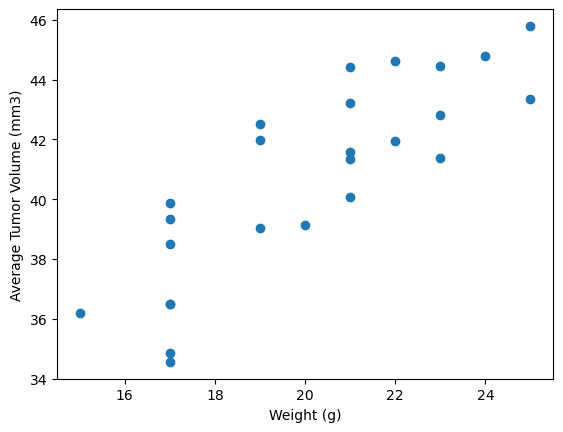

In [25]:
#display the scatterplot of the above DataFrame
#set respective columns as x and y values
capo_x=capo_sp_df["Weight (g)"]
capo_y=capo_sp_df["Average Tumor Volume (mm3)"]
#establish Scatter Plot and label axes
plt.scatter(capo_x,capo_y)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

In [26]:
#Now calculate regression and correlation
#correlation
capo_corr=st.pearsonr(capo_x,capo_y)
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capo_x, capo_y)
capo_regress = capo_x * slope + intercept

The correlation between mouse weight and the average tumor volume is: 0.84.


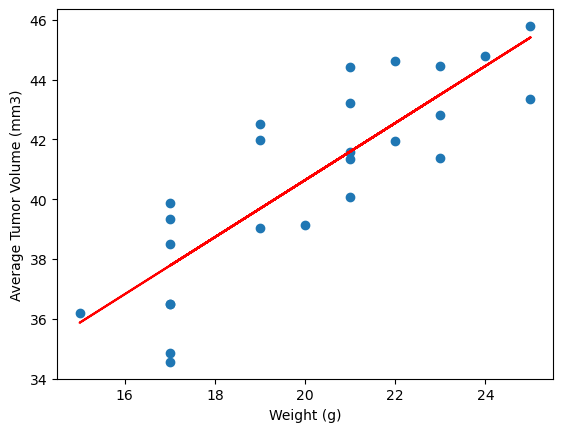

In [27]:
#Display Average Tumor/Weight scatterplot again,
#but with linear regression and correlation
#correlation
print(f"The correlation between mouse weight and the average tumor volume is: {round(capo_corr[0],2)}.")
#scatterplot w/ regression
plt.scatter(capo_x,capo_y)
plt.plot(capo_x,capo_regress,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

# Summary Analysis

Capomulin does seem to show some promise as a treatment for squamous cell carcinoma. Mice treated with Capomulin had consistently lower tumor size than the other treatments, save for the notable exception of Ramicane. In fact, Ramicane may be a superior treatment, as it produced tumors with a similar-perhaps even smaller-size; with more consistent results. 